In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
customers = pd.read_csv('data/olist_customers_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
category_translation = pd.read_csv('data/product_category_name_translation.csv')

In [9]:
import pandas as pd

def inspect_data(df, name="DataFrame"):
    """Simple but comprehensive data inspection"""
    
    print(f"\n{'='*60}")
    print(f"INSPECTING: {name}")
    print(f"{'='*60}\n")
    
    # Basic info
    print(f"Shape: {df.shape[0]:,} rows x {df.shape[1]} columns\n")
    
    # Column overview
    print("Column Overview:")
    print(f"{'Column':<30} {'Type':<15} {'Nulls':<10} {'Unique':<10}")
    print("-" * 65)
    for col in df.columns:
        dtype = str(df[col].dtype)
        nulls = f"{df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)"
        unique = df[col].nunique()
        print(f"{col:<30} {dtype:<15} {nulls:<10} {unique:<10}")
    
    # Missing data
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) > 0:
        print(f"\n⚠️  Columns with missing data:")
        for col, count in missing.items():
            print(f"  • {col}: {count:,} ({count/len(df)*100:.1f}%)")
    
    # Duplicates
    dup_count = df.duplicated().sum()
    if dup_count > 0:
        print(f"\n⚠️  Duplicate rows: {dup_count:,} ({dup_count/len(df)*100:.1f}%)")
    
    # Sample data
    print("\nFirst 3 rows:")
    print(df.head(3))
    
    print("\n" + "="*60 + "\n")


# Usage - inspect all dataframes at once
dataframes = {
    'customers': customers,
    'orders': orders,
    'order_items': order_items,
    'products': products,
    'sellers': sellers,
    'payments': payments,
    'order_reviews': order_reviews,
    'geolocation': geolocation,
    'category_translation': category_translation
}

# Inspect all
for name, df in dataframes.items():
    inspect_data(df, name)

# Or inspect one at a time
# inspect_data(customers, 'customers')


INSPECTING: customers

Shape: 99,441 rows x 5 columns

Column Overview:
Column                         Type            Nulls      Unique    
-----------------------------------------------------------------
customer_id                    object          0 (0.0%)   99441     
customer_unique_id             object          0 (0.0%)   96096     
customer_zip_code_prefix       int64           0 (0.0%)   14994     
customer_city                  object          0 (0.0%)   4119      
customer_state                 object          0 (0.0%)   27        

First 3 rows:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1  

- customer table has 99441 rows and 5 columns- no missing
- Order table  has 99441 rows and 8 columns- has missing
- Order_item has 112650 rows and 7 columns- no missing
- product table has 32951 rows and 9 columns- has missing
- seller has 3095 rows and 4 columns- no missing
- payment has 103886 rows and 5 columns- no missing
- order_review has 99224 rows and 7 columns- no missing
- geolocation has 1000163 rows and 5 columns- duplicates - no missing
- category_tranlation has 71 rows and 2 columns-

In [10]:
# ---------------------------
# Convert orders timestamps
# ---------------------------
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# ---------------------------
# Convert order_reviews timestamps
# ---------------------------
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

# ---------------------------
# Check conversions
# ---------------------------
print(orders.dtypes[['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date','order_delivered_customer_date',
                     'order_estimated_delivery_date']])
print(order_reviews.dtypes[['review_creation_date','review_answer_timestamp']])


order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


In [11]:

# Find full-row duplicates
geo_duplicates = geolocation[geolocation.duplicated(keep=False)]

print(f"Total duplicate rows in geolocation: {geo_duplicates.shape[0]:,}\n")
geo_duplicates.head(10)

Total duplicate rows in geolocation: 390,005



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP
10,1013,-23.547325,-46.634184,sao paulo,SP
13,1012,-23.548946,-46.634671,sao paulo,SP
15,1046,-23.546081,-46.644820,sao paulo,SP


In [12]:
# Define tables and the key columns you want to check
key_checks = {
    'customers': ['customer_id', 'customer_unique_id'],
    'orders': ['order_id', 'customer_id'],
    'sellers': ['seller_id'],
    'products': ['product_id']
}

# Function to check duplicate keys
def check_duplicate_keys(df, keys):
    for key in keys:
        dup_count = df.duplicated(subset=[key]).sum()
        print(f"Table: {df.name if hasattr(df, 'name') else 'Unknown'}, Key: {key}, Duplicate count: {dup_count}")

# Assign names for printing clarity
customers.name = 'customers'
orders.name = 'orders'
sellers.name = 'sellers'
products.name = 'products'

# Run the check
for table, keys in key_checks.items():
    df = globals()[table]  # get the dataframe by variable name
    check_duplicate_keys(df, keys)


Table: customers, Key: customer_id, Duplicate count: 0
Table: customers, Key: customer_unique_id, Duplicate count: 3345
Table: orders, Key: order_id, Duplicate count: 0
Table: orders, Key: customer_id, Duplicate count: 0
Table: sellers, Key: seller_id, Duplicate count: 0
Table: products, Key: product_id, Duplicate count: 0


customer_unique_id represents the same customer who may have multiple orders

In [13]:
# Ensure timestamps are in datetime (you already converted them)
# orders['order_purchase_timestamp']
# orders['order_delivered_customer_date']

# Calculate delivery time in hours
orders['delivery_hours'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.total_seconds() / 3600

# Quick check
orders[['order_id','order_purchase_timestamp','order_delivered_customer_date','delivery_hours']].head(10)


,order_id,order_purchase_timestamp,order_delivered_customer_date,delivery_hours
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,202.477778
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,330.768889
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,225.461111
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,317.010000
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,68.973056
5,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,2017-07-26 10:57:55,397.013889
6,136cce7faa42fdb2cefd53fdc79a6098,2017-04-11 12:22:08,NaT,NaN
7,6514b8ad8028c9f2cc2374ded245783f,2017-05-16 13:10:30,2017-05-26 12:55:51,239.755833
8,76c6e866289321a7c93b82b54852dc33,2017-01-23 18:29:09,2017-02-02 14:08:10,235.650278
9,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,2017-08-16 17:14:30,437.324444


freight_value: 12134 outliers (10.77%)
price: 8427 outliers (7.48%)
delivery_hours: 4899 outliers (4.93%)


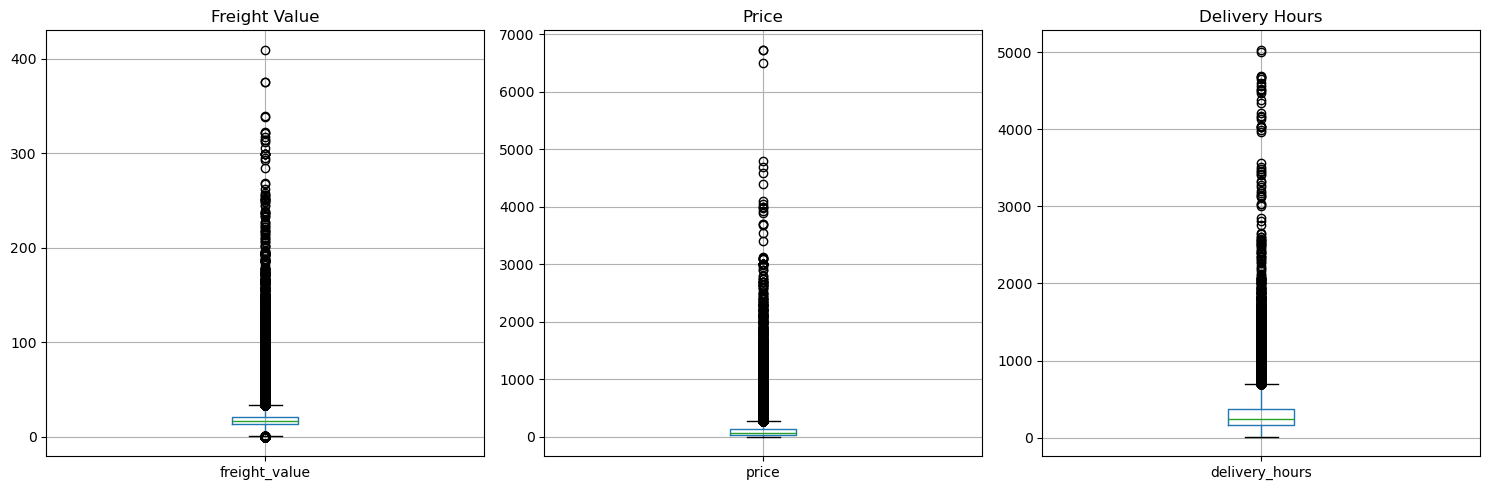

In [14]:
# ---------------------------
# Outlier check function
# ---------------------------
def detect_outliers(df, col):
    """
    Detects outliers using IQR method.
    Returns a boolean series where True = outlier.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    print(f"{col}: {outliers.sum()} outliers ({100*outliers.sum()/len(df):.2f}%)")
    return outliers

# ---------------------------
# Check outliers for relevant columns
# ---------------------------
freight_outliers = detect_outliers(order_items, 'freight_value')
price_outliers = detect_outliers(order_items, 'price')
delivery_outliers = detect_outliers(orders, 'delivery_hours')

# ---------------------------
# Optional: visualize with boxplots
# ---------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
order_items.boxplot(column='freight_value')
plt.title('Freight Value')

plt.subplot(1,3,2)
order_items.boxplot(column='price')
plt.title('Price')

plt.subplot(1,3,3)
orders.boxplot(column='delivery_hours')
plt.title('Delivery Hours')

plt.tight_layout()
plt.show()


#### capping

In [15]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    capped_col = f"{col}_capped"
    df[capped_col] = df[col].clip(lower, upper)
    return df


In [16]:
order_items = cap_outliers_iqr(order_items, 'price')
order_items = cap_outliers_iqr(order_items, 'freight_value')


In [17]:
def flag_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[f"{col}_outlier"] = ((df[col] < lower) | (df[col] > upper)).astype(int)
    return df

orders = flag_outliers_iqr(orders, 'delivery_hours')


In [18]:
def check_missing(df, name="DataFrame"):
    """Generic missing-value audit for any dataframe"""
    
    print(f"\n{'='*60}")
    print(f"MISSING VALUE AUDIT: {name}")
    print(f"{'='*60}\n")
    
    total_rows = len(df)
    
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    
    if missing.empty:
        print("✅ No missing values found.")
        return
    
    print(f"{'Column':<35} {'Missing':<12} {'Percent'}")
    print("-" * 60)
    
    for col, count in missing.items():
        pct = (count / total_rows) * 100
        print(f"{col:<35} {count:<12,} {pct:.2f}%")


In [19]:
for name, df in dataframes.items():
    check_missing(df, name)



MISSING VALUE AUDIT: customers

✅ No missing values found.

MISSING VALUE AUDIT: orders

Column                              Missing      Percent
------------------------------------------------------------
order_approved_at                   160          0.16%
order_delivered_carrier_date        1,783        1.79%
order_delivered_customer_date       2,965        2.98%
delivery_hours                      2,965        2.98%

MISSING VALUE AUDIT: order_items

✅ No missing values found.

MISSING VALUE AUDIT: products

Column                              Missing      Percent
------------------------------------------------------------
product_category_name               610          1.85%
product_name_lenght                 610          1.85%
product_description_lenght          610          1.85%
product_photos_qty                  610          1.85%
product_weight_g                    2            0.01%
product_length_cm                   2            0.01%
product_height_cm             

In [20]:
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [21]:
products_translated = products.merge(
    category_translation,
    on='product_category_name',
    how='left'
)


In [22]:
missing_translation = (
    products_translated
    .loc[products_translated['product_category_name_english'].isna(),
         'product_category_name']
    .value_counts()
)

missing_translation


product_category_name
portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: count, dtype: int64

#### EDA

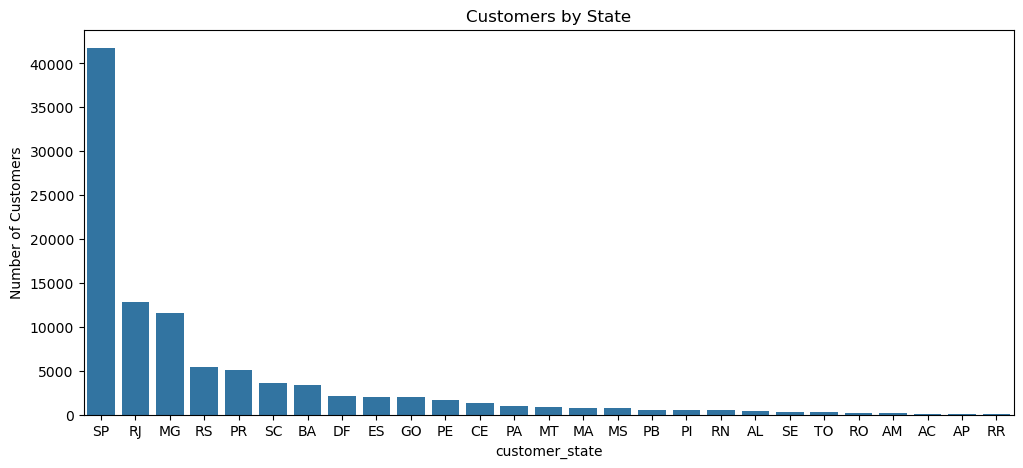

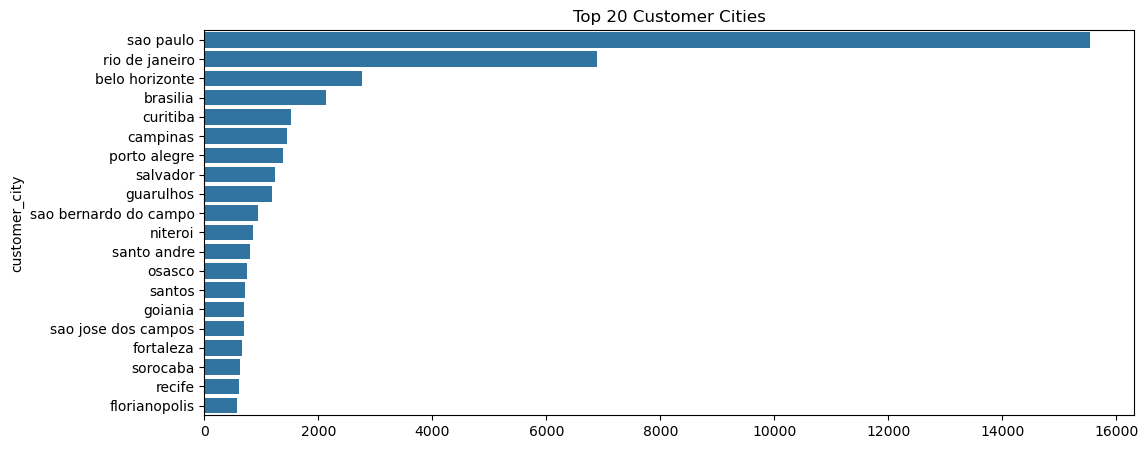

In [23]:
####Customers Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Customer distribution by state
plt.figure(figsize=(12,5))
sns.countplot(data=customers, x='customer_state', order=customers['customer_state'].value_counts().index)
plt.title('Customers by State')
plt.ylabel('Number of Customers')
plt.show()

# Top cities
top_cities = customers['customer_city'].value_counts().head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 20 Customer Cities')
plt.show()


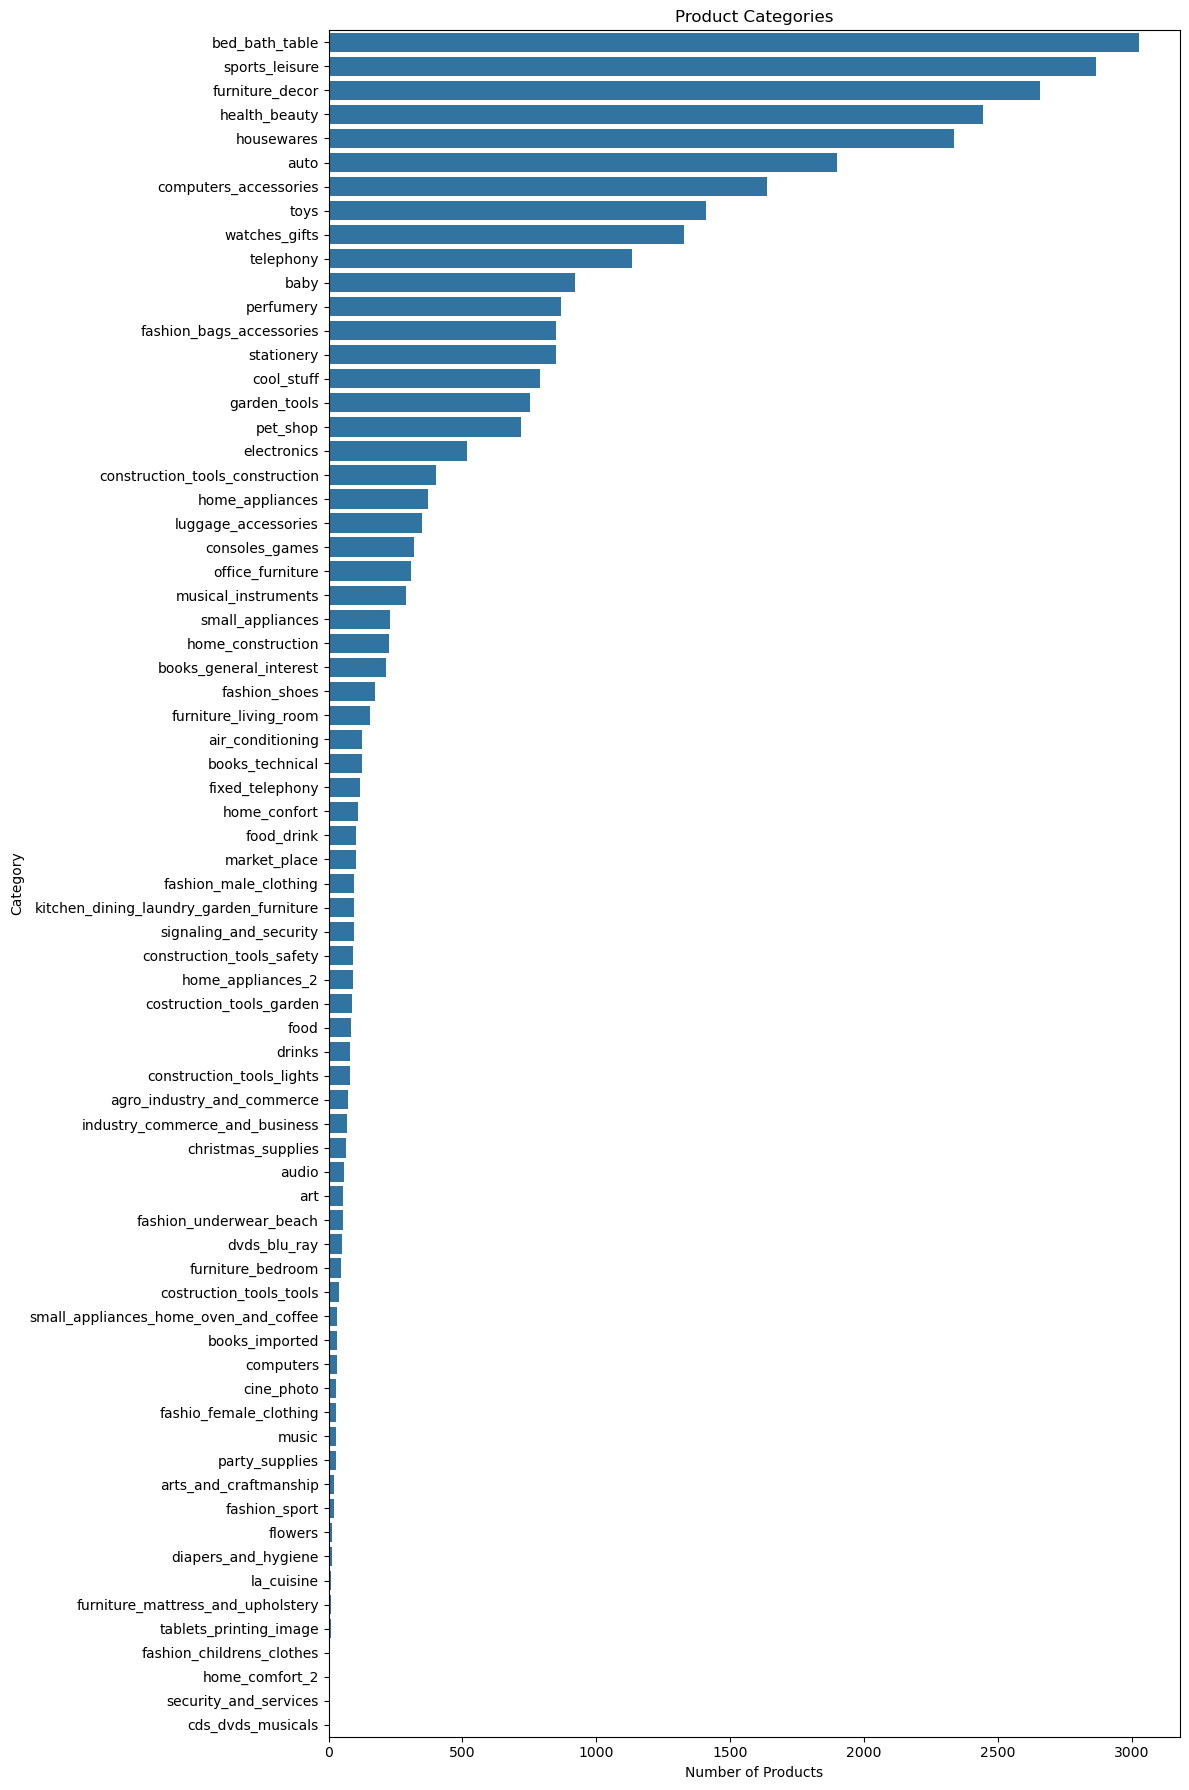

In [24]:
# Product category distribution (English) - stretched for readability
plt.figure(figsize=(12,18))  # taller figure
sns.countplot(
    data=products_translated,
    y='product_category_name_english',  # horizontal bars
    order=products_translated['product_category_name_english'].value_counts().index
)
plt.title('Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.tight_layout()
plt.show()



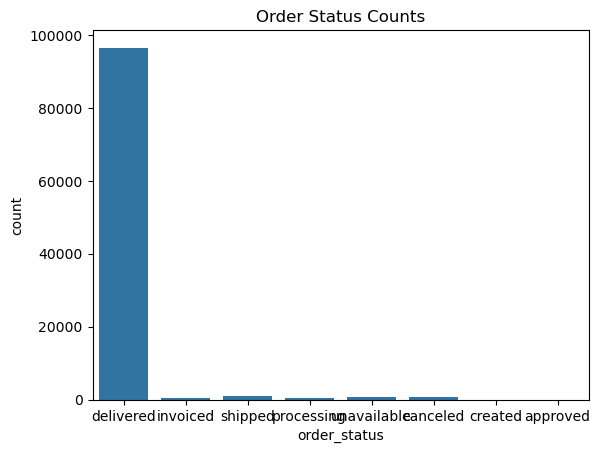

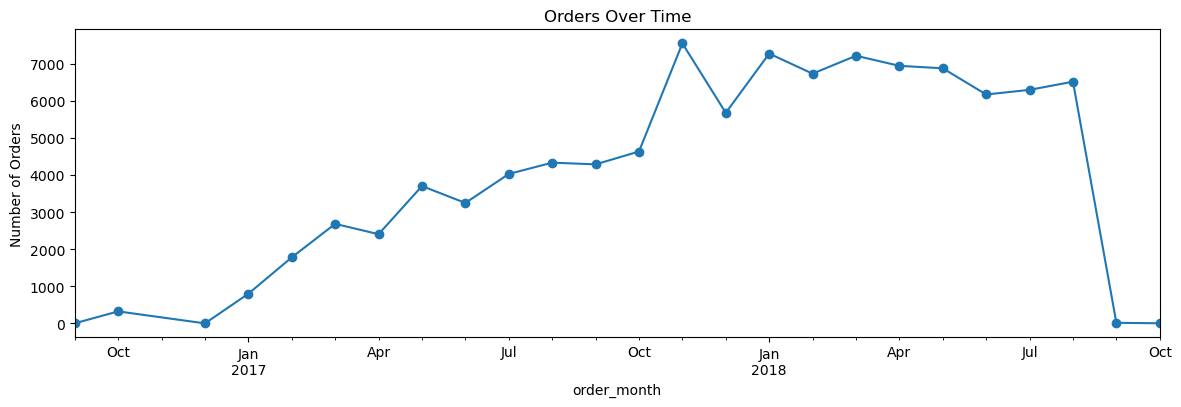

In [25]:
#### Orders Analysis

# Order status distribution
sns.countplot(data=orders, x='order_status')
plt.title('Order Status Counts')
plt.show()

# Orders over time (monthly)
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders_monthly = orders.groupby('order_month').size()
orders_monthly.plot(figsize=(14,4), marker='o', title='Orders Over Time')
plt.ylabel('Number of Orders')
plt.show()

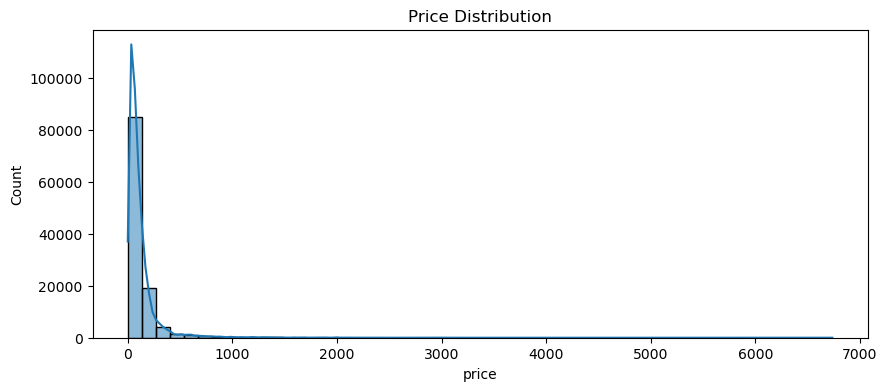

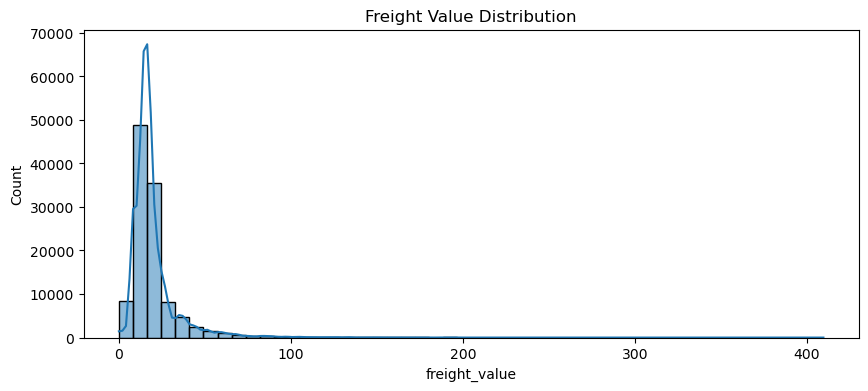

In [26]:
#### Products Analysis

# Price distribution
plt.figure(figsize=(10,4))
sns.histplot(order_items['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

# Freight value
plt.figure(figsize=(10,4))
sns.histplot(order_items['freight_value'], bins=50, kde=True)
plt.title('Freight Value Distribution')
plt.show()


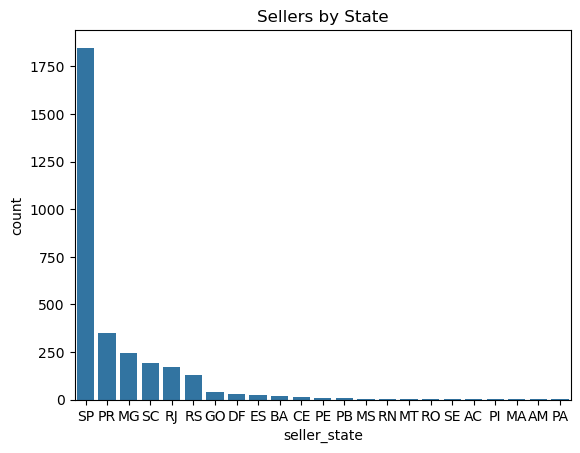

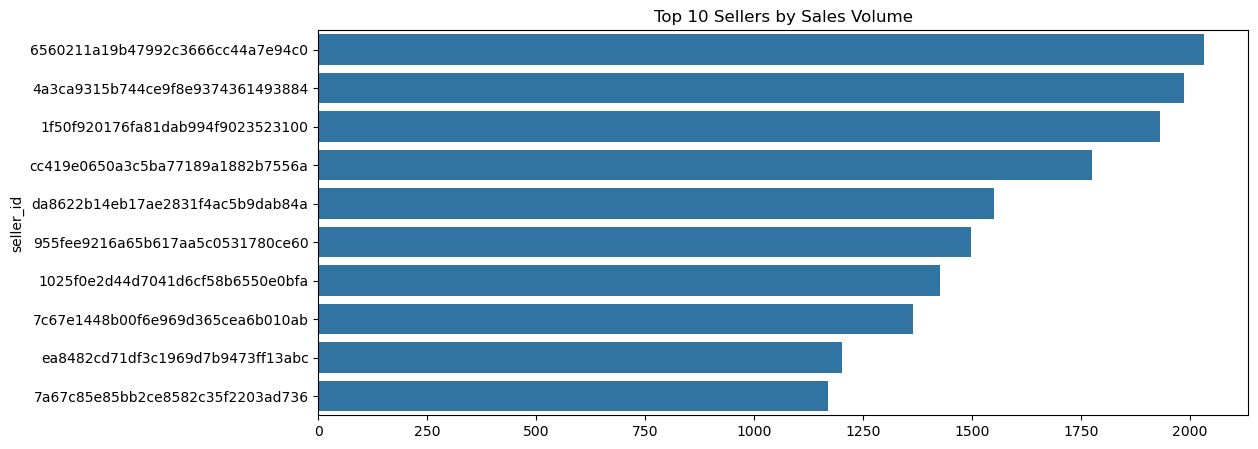

In [27]:
#### Sellers Analysis

# Sellers by state
sns.countplot(data=sellers, x='seller_state', order=sellers['seller_state'].value_counts().index)
plt.title('Sellers by State')
plt.show()

# Top sellers by number of products sold
top_sellers = order_items['seller_id'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_sellers.values, y=top_sellers.index)
plt.title('Top 10 Sellers by Sales Volume')
plt.show()


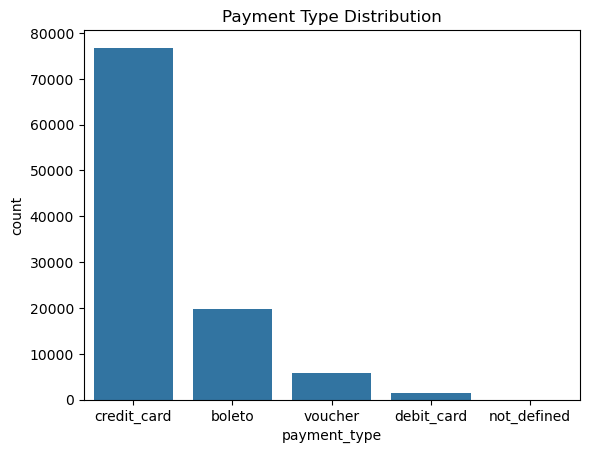

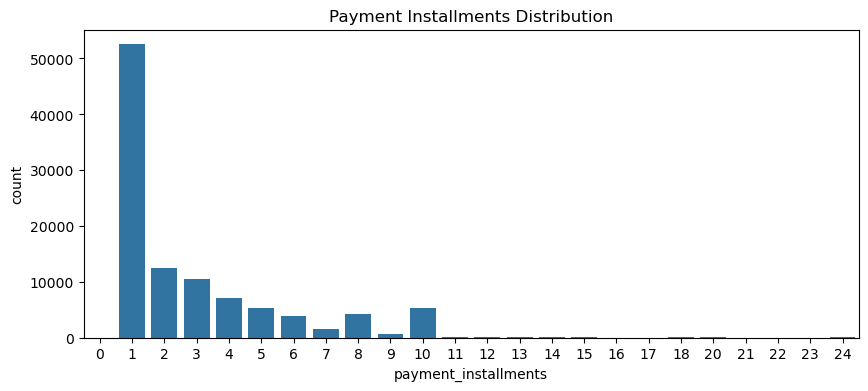

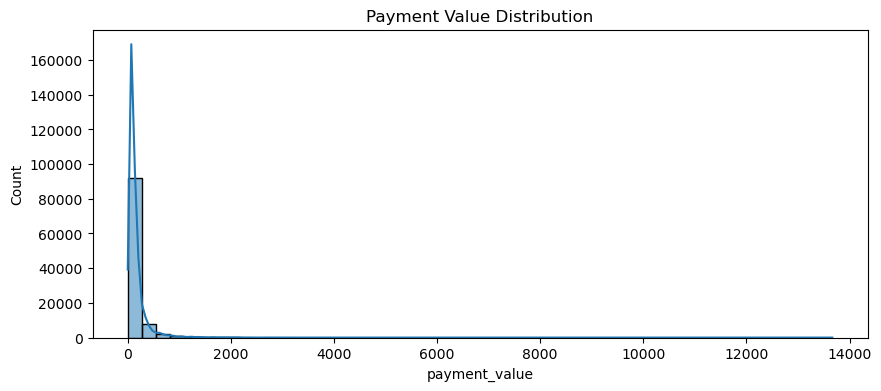

In [28]:
#### Payments Analysis

# Payment type
sns.countplot(data=payments, x='payment_type', order=payments['payment_type'].value_counts().index)
plt.title('Payment Type Distribution')
plt.show()

# Payment installments
plt.figure(figsize=(10,4))
sns.countplot(data=payments, x='payment_installments')
plt.title('Payment Installments Distribution')
plt.show()

# Payment value
plt.figure(figsize=(10,4))
sns.histplot(payments['payment_value'], bins=50, kde=True)
plt.title('Payment Value Distribution')
plt.show()


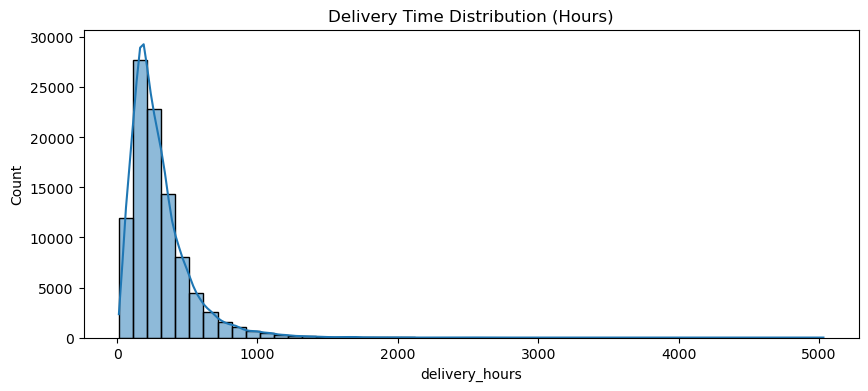

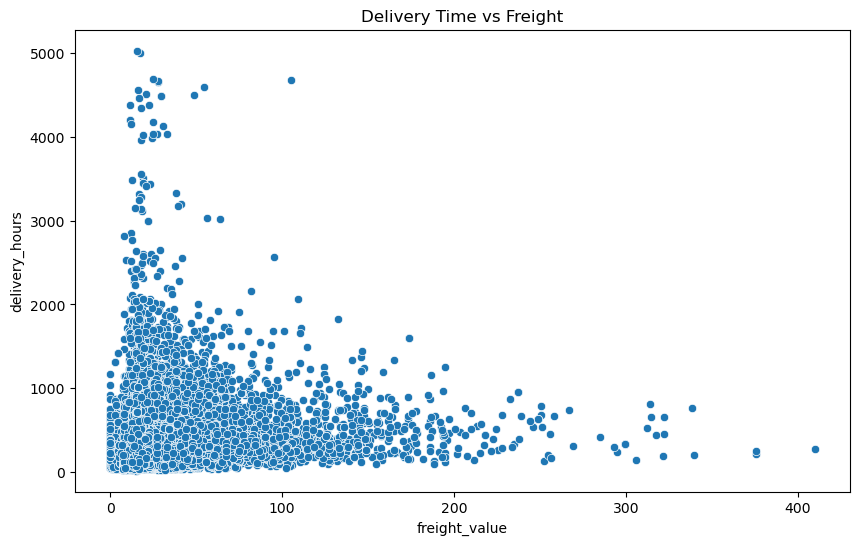

In [29]:
#### Delivery Time Analysis

plt.figure(figsize=(10,4))
sns.histplot(orders['delivery_hours'], bins=50, kde=True)
plt.title('Delivery Time Distribution (Hours)')
plt.show()

# Scatter: delivery time vs freight
plt.figure(figsize=(10,6))
sns.scatterplot(x='freight_value', y='delivery_hours', data=order_items.merge(orders[['order_id','delivery_hours']], on='order_id'))
plt.title('Delivery Time vs Freight')
plt.show()



In [30]:
master_df = orders \
    .merge(customers, on='customer_id', how='left') \
    .merge(order_items, on='order_id', how='left') \
    .merge(products_translated, on='product_id', how='left') \
    .merge(sellers, on='seller_id', how='left') \
    .merge(payments, on='order_id', how='left') \
    .merge(order_reviews, on='order_id', how='left')


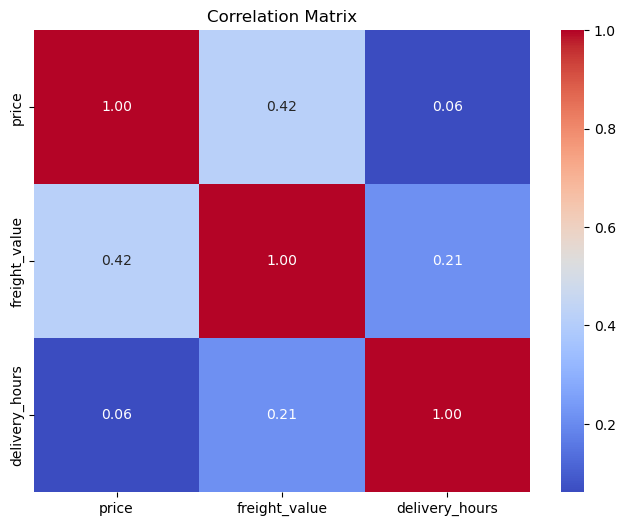

In [31]:
#### Correlation Matrix

# Select numeric columns for correlation
numeric_cols = ['price', 'freight_value', 'delivery_hours']

# Compute correlation
corr = master_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [32]:
# Save master_df as CSV
master_df.to_csv("master_df.csv", index=False)